In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dating = pd.read_csv('Speed Dating Data.csv', encoding = "ISO-8859-1")

In [5]:
dating.shape

(8378, 195)

In [6]:
dating.head(3)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [7]:
dating.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

It's a rather wide dataset which means there are lots of columns given to us. The first important thing for our later 
analysis is selecting useful features.

### Firstly we would like to find are there any attributes' preference differences between the male and the female?

In [8]:
dating_pf = dating[['iid', 'gender', 'wave', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].drop_duplicates().set_index('iid')

In [9]:
dating_pf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 1 to 552
Data columns (total 8 columns):
gender      551 non-null int64
wave        551 non-null int64
attr1_1     544 non-null float64
sinc1_1     544 non-null float64
intel1_1    544 non-null float64
fun1_1      543 non-null float64
amb1_1      542 non-null float64
shar1_1     541 non-null float64
dtypes: float64(6), int64(2)
memory usage: 38.7 KB


In [10]:
dating_pf.describe()

,gender,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,551.000000,551.000000,544.000000,544.000000,544.000000,543.000000,542.000000,541.000000
mean,0.502722,11.083485,22.685478,17.290754,20.170478,17.451363,10.806476,11.832126
std,0.500447,6.013947,12.971917,7.204724,6.878993,6.190985,6.229105,6.474104
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,15.000000,14.927500,17.292500,15.000000,5.000000,8.330000
50%,1.000000,11.000000,20.000000,18.000000,20.000000,18.000000,10.000000,11.000000
75%,1.000000,15.000000,25.000000,20.000000,23.020000,20.000000,15.000000,16.000000
max,1.000000,21.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000


From the info and describption above, there are NaN values for different attributes, but overall the values are in the 
range between 0 and 100. We will need to deal with NaN values later and try to rescale the attributes' values in certain rows to be total of 100 if not the case.

In [11]:
# check if there are still duplicate iids
len(dating_pf.index.unique()) == len(dating_pf.index)

True

In [12]:
## need to check attributes' values from wave 6 to 9 here since it's mentioned in the doc key that the scale method for
## this few waves are different from the other waves:
dating_pf[(dating_pf['wave'] >= 6) & (dating_pf['wave'] <= 9)].head()

,gender,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
iid,,,,,,,,
132,0,6,16.67,16.67,16.67,16.67,16.67,16.67
133,0,6,12.77,19.15,17.02,17.02,14.89,19.15
134,0,6,6.67,20.00,20.00,17.78,20.00,15.56
135,0,6,18.18,22.73,18.18,13.64,13.64,13.64
136,0,6,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
## Actually even though for wave 6-9, the score scale is different, the original data for the certain waves is already 
## normalized to sum up to 100 as other waves
dating_pf.head()

,gender,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
iid,,,,,,,,
1,0,1,15.0,20.0,20.0,15.0,15.0,15.0
2,0,1,45.0,5.0,25.0,20.0,0.0,5.0
3,0,1,35.0,10.0,35.0,10.0,10.0,0.0
4,0,1,20.0,20.0,20.0,20.0,10.0,10.0
5,0,1,20.0,5.0,25.0,25.0,10.0,15.0


In [14]:
pd.isnull(dating_pf).any()

gender      False
wave        False
attr1_1      True
sinc1_1      True
intel1_1     True
fun1_1       True
amb1_1       True
shar1_1      True
dtype: bool

In [15]:
# From the above results, we can see only the 6 attributes preferences having NA values here, we will first remove the 
# rows with NaN values for all 6 attributes:
boolean = pd.isnull(dating_pf[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1','shar1_1']]).all(axis = 1)
dating_pf = dating_pf[-boolean]

In [16]:
dating_pf.shape

(544, 8)

In [17]:
dating_pf.tail()

,gender,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
iid,,,,,,,,
548,1,21,40.0,10.0,20.0,10.0,0.0,20.0
549,1,21,20.0,20.0,20.0,20.0,0.0,20.0
550,1,21,30.0,3.0,30.0,30.0,3.0,4.0
551,1,21,40.0,20.0,20.0,20.0,0.0,0.0
552,1,21,70.0,0.0,15.0,15.0,0.0,0.0


In [18]:
# Then impute the left NaN values to be the mean value for each attribute within each gender group
dating_pf[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1','shar1_1']] = (dating_pf[['gender', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1','shar1_1']].
        groupby('gender').transform(lambda x: x.fillna(x.mean())))

In [19]:
dating_pf.head()

,gender,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
iid,,,,,,,,
1,0,1,15.0,20.0,20.0,15.0,15.0,15.0
2,0,1,45.0,5.0,25.0,20.0,0.0,5.0
3,0,1,35.0,10.0,35.0,10.0,10.0,0.0
4,0,1,20.0,20.0,20.0,20.0,10.0,10.0
5,0,1,20.0,5.0,25.0,25.0,10.0,15.0


In [20]:
# For cases the sum of all 6 attributes not equal to 100, we will normalize them to 100 here
dating_pf[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']] = dating_pf[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].apply(lambda x: round(x / np.sum(x) * 100, 2), axis = 1)

In [21]:
dating_pf.head(10)

,gender,wave,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
iid,,,,,,,,
1,0,1,15.00,20.00,20.00,15.00,15.00,15.00
2,0,1,45.00,5.00,25.00,20.00,0.00,5.00
3,0,1,35.00,10.00,35.00,10.00,10.00,0.00
4,0,1,20.00,20.00,20.00,20.00,10.00,10.00
5,0,1,20.00,5.00,25.00,25.00,10.00,15.00
6,0,1,10.00,25.00,20.00,25.00,5.00,15.00
7,0,1,15.00,15.00,25.00,20.00,15.00,10.00
8,0,1,9.09,18.18,27.27,18.18,18.18,9.09
9,0,1,20.00,10.00,20.00,30.00,10.00,10.00


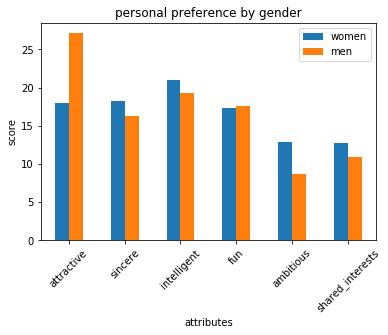

In [22]:
dating_pf.groupby('gender')['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'].mean().T.plot(kind = 'bar',title = 'personal preference by gender')
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(6), ('attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_interests'), rotation = 45 )

From the result, we can see men value attractiveness more than women, while women will compensate the 
outlook by ambitious, shared interests, sincerity and intelligence. It seems that women are more likely to date a well-rounded person than male.

The top 3 valued attributes by male are: attractive, intelligent and fun

The top 3 valued attributes by female are: intelligent, attractive and sincere


### What do you think of your fellow men/women look for in the opposite sex?

In [23]:
dating_fellow = dating[['iid', 'gender', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']].drop_duplicates().set_index('iid')

In [24]:
dating_fellow.shape

(551, 7)

In [25]:
dating_fellow.tail()

,gender,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
iid,,,,,,,
548,1,60.0,0.0,0.0,20.0,0.0,20.0
549,1,50.0,10.0,5.0,20.0,5.0,10.0
550,1,30.0,3.0,30.0,30.0,3.0,4.0
551,1,25.0,5.0,20.0,20.0,15.0,15.0
552,1,90.0,0.0,0.0,0.0,0.0,10.0


In [26]:
# remove the rows with all attributes being NA
boolean = pd.isnull(dating_fellow[['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1','shar4_1']]).all(axis = 1)
dating_fellow = dating_fellow[-boolean]

In [27]:
dating_fellow.shape

(417, 7)

In [28]:
pd.isnull(dating_fellow).any()

gender      False
attr4_1     False
sinc4_1     False
intel4_1    False
fun4_1      False
amb4_1      False
shar4_1      True
dtype: bool

In [29]:
dating_fellow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 132 to 552
Data columns (total 7 columns):
gender      417 non-null int64
attr4_1     417 non-null float64
sinc4_1     417 non-null float64
intel4_1    417 non-null float64
fun4_1      417 non-null float64
amb4_1      417 non-null float64
shar4_1     416 non-null float64
dtypes: float64(6), int64(1)
memory usage: 26.1 KB


In [30]:
# Then impute the left NaN values to be the mean value for each attribute within each gender group
dating_fellow[['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1','shar4_1']] = (dating_fellow[['gender', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1','shar4_1']].
        groupby('gender').transform(lambda x: x.fillna(x.mean())))

In [31]:
# due to the scale difference, we should also normalize the row to sum to 100 
dating_fellow[['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']] = dating_fellow[['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']].apply(lambda x: round(x / np.sum(x) * 100, 2), axis = 1)

In [32]:
dating_fellow.head()

,gender,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
iid,,,,,,,
132,0,23.26,16.28,16.28,16.28,11.63,16.28
133,0,17.07,17.07,17.07,17.07,14.63,17.07
134,0,13.64,20.45,20.45,15.91,15.91,13.64
135,0,16.33,16.33,16.33,18.37,18.37,14.29
137,1,21.95,14.63,12.20,19.51,12.20,19.51


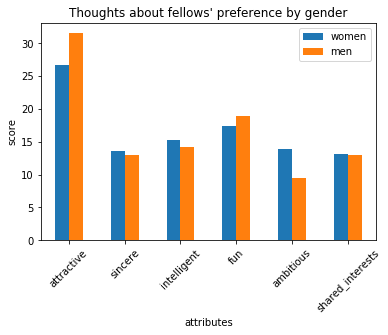

In [33]:
dating_fellow.groupby('gender')['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1'].mean().T.plot(kind = 'bar', title = r"Thoughts about fellows' preference by gender")
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(6), ('attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_interests'), rotation = 45 )

### What do you think the opposite sex looks for in a date?

In [34]:
dating_opp = dating[['iid', 'gender', 'wave', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].drop_duplicates().set_index('iid')

In [35]:
dating_opp.head()

,gender,wave,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1
iid,,,,,,,,
1,0,1,35.0,20.0,15.0,20.0,5.0,5.0
2,0,1,65.0,0.0,10.0,25.0,0.0,0.0
3,0,1,50.0,0.0,20.0,30.0,0.0,0.0
4,0,1,30.0,10.0,15.0,30.0,5.0,10.0
5,0,1,50.0,10.0,10.0,20.0,5.0,5.0


In [36]:
dating_opp.shape

(551, 8)

In [37]:
# remove rows with all attributes as NA
boolean = pd.isnull(dating_opp[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1','shar2_1']]).all(axis = 1)
dating_opp = dating_opp[-boolean]

In [38]:
dating_opp.shape

(544, 8)

In [39]:
pd.isnull(dating_opp).any()

gender      False
wave        False
attr2_1     False
sinc2_1     False
intel2_1    False
fun2_1      False
amb2_1       True
shar2_1      True
dtype: bool

In [40]:
# Then impute the left NaN values to be the mean value for each attribute within each gender group
dating_opp[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1','shar2_1']] = (dating_opp[['gender', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1','shar2_1']].
        groupby('gender').transform(lambda x: x.fillna(x.mean())))

In [41]:
dating_opp[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']] = dating_opp[['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].apply(lambda x: round(x / np.sum(x) * 100, 2), axis = 1)

In [42]:
dating_opp.shape

(544, 8)

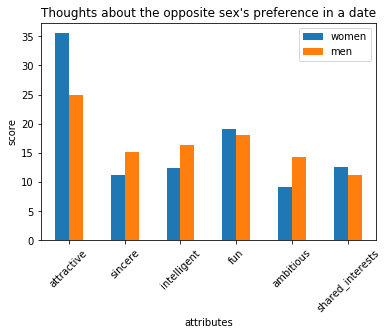

In [43]:
dating_opp.groupby('gender')['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1'].mean().T.plot(kind = 'bar', title = r"Thoughts about the opposite sex's preference in a date")
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(6), ('attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_interests'), rotation = 45 )

### How do you measure up yourself?

In [44]:
dating_measure = dating[['iid', 'gender', 'wave', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].drop_duplicates().set_index('iid')

In [45]:
dating_measure.head()

,gender,wave,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1
iid,,,,,,,
1,0,1,6.0,8.0,8.0,8.0,7.0
2,0,1,7.0,5.0,8.0,10.0,3.0
3,0,1,8.0,9.0,9.0,8.0,8.0
4,0,1,7.0,8.0,7.0,9.0,8.0
5,0,1,6.0,3.0,10.0,6.0,8.0


In [46]:
dating_measure.shape

(551, 7)

In [47]:
# remove rows with all attributes as NA
boolean = pd.isnull(dating_measure[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']]).all(axis = 1)
dating_measure = dating_measure[-boolean]

In [48]:
dating_measure.shape

(542, 7)

In [49]:
pd.isnull(dating_measure).any()

gender      False
wave        False
attr3_1     False
sinc3_1     False
intel3_1    False
fun3_1      False
amb3_1      False
dtype: bool

In [50]:
dating_measure.tail()

,gender,wave,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1
iid,,,,,,,
548,1,21,10.0,10.0,10.0,10.0,10.0
549,1,21,7.0,10.0,9.0,8.0,9.0
550,1,21,7.0,7.0,7.0,7.0,7.0
551,1,21,7.0,8.0,8.0,3.0,5.0
552,1,21,8.0,7.0,7.0,6.0,7.0


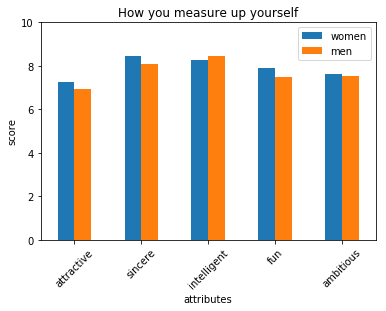

In [51]:
dating_measure.groupby('gender')['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1'].mean().T.plot(kind = 'bar', ylim = [0, 10], title = 'How you measure up yourself')
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(5), ('attractive', 'sincere', 'intelligent', 'fun', 'ambitious'), rotation = 45 )

### How do you think others perceive you?

In [52]:
dating_others = dating[['iid', 'gender', 'wave', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']].drop_duplicates().set_index('iid')

In [53]:
dating_others.tail()

,gender,wave,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
iid,,,,,,,
548,1,21,10.0,10.0,10.0,10.0,10.0
549,1,21,7.0,10.0,10.0,7.0,7.0
550,1,21,7.0,7.0,7.0,7.0,7.0
551,1,21,7.0,9.0,9.0,2.0,4.0
552,1,21,9.0,7.0,10.0,5.0,9.0


In [54]:
dating_others.shape

(551, 7)

In [55]:
# remove rows with all attributes as NA
boolean = pd.isnull(dating_others[['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']]).all(axis = 1)
dating_others = dating_others[-boolean]

In [56]:
dating_others.shape

(314, 7)

In [57]:
pd.isnull(dating_others).any()

gender      False
wave        False
attr5_1     False
sinc5_1     False
intel5_1    False
fun5_1      False
amb5_1      False
dtype: bool

In [58]:
dating_others.shape

(314, 7)

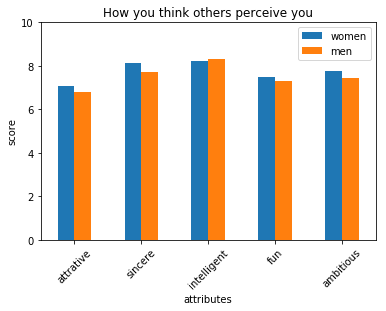

In [59]:
dating_others.groupby('gender')['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1'].mean().T.plot(kind = 'bar', ylim = [0, 10], title = 'How you think others perceive you')
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(5), ('attrative', 'sincere', 'intelligent', 'fun', 'ambitious'), rotation = 45 )

### What your partners' real ratings for each attribute?

In [60]:
dating_real = dating[['iid', 'pid', 'gender', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']].drop_duplicates().set_index(['iid', 'pid'])

In [61]:
dating_real.head()

gender  attr_o  sinc_o  intel_o  fun_o  amb_o
iid pid                                                
1   11.0       0     6.0     8.0      8.0    8.0    8.0
    12.0       0     7.0     8.0     10.0    7.0    7.0
    13.0       0    10.0    10.0     10.0   10.0   10.0
    14.0       0     7.0     8.0      9.0    8.0    9.0
    15.0       0     8.0     7.0      9.0    6.0    9.0

In [62]:
dating_real.shape

(8378, 6)

In [63]:
# remove rows with all attributes as NA
boolean = pd.isnull(dating_real[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']]).all(axis = 1)
dating_real = dating_real[-boolean]

In [64]:
dating_real.shape

(8176, 6)

In [65]:
pd.isnull(dating_real).any()

gender     False
attr_o      True
sinc_o      True
intel_o     True
fun_o       True
amb_o       True
dtype: bool

In [66]:
dating_real = dating_real.fillna(0)
exp3 = dating_real.groupby('gender').agg(np.mean)
exp3

,attr_o,sinc_o,intel_o,fun_o,amb_o
gender,,,,,
0,6.451920,7.158841,7.194913,6.405356,6.192712
1,5.913629,7.042452,7.356252,6.148397,6.501957


In [67]:
dating_real.shape

(8176, 6)

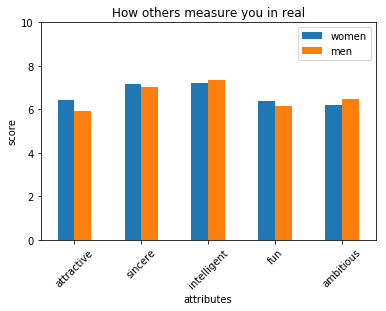

In [68]:
dating_real.groupby('gender')['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o'].mean().T.plot(kind = 'bar', ylim = [0, 10], title = 'How others measure you in real')
plt.xlabel('attributes')
plt.ylabel('score')
plt.legend(['women', 'men'])
_ = plt.xticks(np.arange(5), ('attractive', 'sincere', 'intelligent', 'fun', 'ambitious'), rotation = 45 )

From the above three plots, we can see that roughly the results comparison by gender are consistent across the three different perspective expect the 'ambitious' attribute where women generally think about themselves to be more ambitious than men while the average rated score shows the opposite. Another interesting fact is that the average scores for all attributes from 'how they measure up themselves' and 'how they think others perceive them' are higher than their real given average score. It shows that people are generally confident and think highly about themselves while being 'mean' to the others.

To do next:
1. generate more advanced plots like radar plots
2. separate RF model for men and women (6 attributes and the final decision) and find the attributes importance
3. a final match model involved in more attributes to find the predictors that contribute more to the final match

### Clustering people based on their own features by gender, then calculate the one-sided decision rate or match rate for each pair of clusters available to find insights about potential attraction with certain general features. Since

In [69]:
dating.shape

(8378, 195)

In [70]:
dating['race'].value_counts()

2.0    4727
4.0    1982
3.0     664
6.0     522
1.0     420
Name: race, dtype: int64

In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [72]:
## deal with categorical data for clustering methods: may try k-modes, or one-hot encoding 
men_cluster = dating[dating['gender'] == 1]
women_cluster = dating[dating['gender'] == 0]

In [73]:
men_cluster.shape, women_cluster.shape

((4194, 195), (4184, 195))

In [74]:
men_cluster = men_cluster[['iid', 'attr_o', 'sinc_o', 
                          'intel_o', 'fun_o', 'amb_o']]

In [75]:
men_cluster.head()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o
100,11,6.0,9.0,7.0,7.0,6.0
101,11,5.0,7.0,8.0,4.0,6.0
102,11,7.0,9.0,10.0,7.0,8.0
103,11,4.0,10.0,8.0,5.0,8.0
104,11,5.0,8.0,8.0,2.0,2.0


In [76]:
pd.isnull(men_cluster).any()

iid        False
attr_o      True
sinc_o      True
intel_o     True
fun_o       True
amb_o       True
dtype: bool

In [77]:
men_cluster[men_cluster.isnull().any(axis = 1)].head()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o
515,40,4.0,8.0,7.0,9.0,NaN
526,41,7.0,8.0,NaN,NaN,8.0
534,41,7.0,8.0,9.0,NaN,9.0
545,42,6.0,8.0,NaN,7.0,NaN
564,43,7.0,8.0,8.0,8.0,NaN


In [78]:
# directly calculate the mean of each attribute for each person ignoring the NaN value
men_cluster = men_cluster.groupby('iid').agg(np.mean)

In [79]:
men_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 11 to 552
Data columns (total 5 columns):
attr_o     277 non-null float64
sinc_o     277 non-null float64
intel_o    277 non-null float64
fun_o      277 non-null float64
amb_o      277 non-null float64
dtypes: float64(5)
memory usage: 13.0 KB


In [80]:
men_cluster.head()
# pay attention to the difference between normalization and standardization, here for our kmeans or hierarchy case, we 
# should do standardization for each 5 attribute

,attr_o,sinc_o,intel_o,fun_o,amb_o
iid,,,,,
11,5.6,8.8,8.2,5.4,6.4
12,7.1,6.6,7.1,6.7,6.9
13,4.8,7.9,8.8,7.0,5.9
14,8.2,7.6,7.4,7.6,6.6
15,5.7,7.6,7.7,7.2,6.5


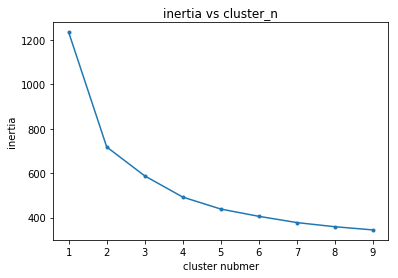

In [81]:
from sklearn.cluster import KMeans
clusterNumber = np.arange(1, 10)
inertia_men = np.empty(len(clusterNumber))
for i, number in enumerate(clusterNumber):
    model = KMeans(n_clusters = number, random_state= 42)
    model.fit(men_cluster)
    inertia_men[i] = model.inertia_
plt.plot(clusterNumber, inertia_men,  marker = '.')
plt.title('inertia vs cluster_n')
plt.xlabel('cluster nubmer')
plt.ylabel('inertia')
plt.show()

Text(0.5,1,"Men' sttributes centroids for 4 clusters")

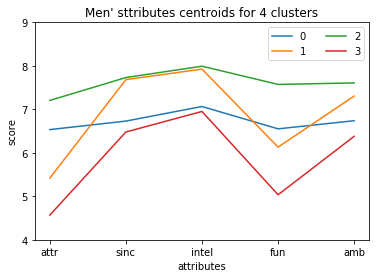

In [82]:
# from the above result, I would like to make the cluster number for men to be 4
men_model = KMeans(n_clusters = 4, random_state = 42)
men_model.fit(men_cluster)
men_centroids = men_model.cluster_centers_
for i in range(4):
    plt.plot(np.arange(5), men_centroids[i])
plt.xlabel('attributes')
plt.xticks(np.arange(5), ['attr', 'sinc', 'intel', 'fun', 'amb'])
plt.ylabel('score')
plt.ylim([4, 9])
plt.legend(np.arange(4), loc = 'upper right', ncol= 2)
plt.title(r"Men' sttributes centroids for 4 clusters")

In [83]:
all_sided_m = men_cluster[men_model.labels_ == 2]
print(all_sided_m.head())
well_looked_m = men_cluster[men_model.labels_ == 0]
print(well_looked_m.head())
no_attr_m = men_cluster[men_model.labels_ == 1]
print(no_attr_m.head())
low_status_m = men_cluster[men_model.labels_ == 3]
print(low_status_m.head())

     attr_o    sinc_o   intel_o  fun_o     amb_o
iid                                             
14      8.2  7.600000  7.400000    7.6  6.600000
19      7.7  6.800000  7.700000    8.5  7.100000
20      7.5  7.300000  7.900000    8.2  8.400000
69      7.3  7.600000  7.900000    7.1  7.111111
70      6.0  7.444444  8.555556    8.0  8.444444
       attr_o    sinc_o   intel_o     fun_o     amb_o
iid                                                  
12   7.100000  6.600000  7.100000  6.700000  6.900000
46   7.631579  6.789474  7.315789  6.777778  6.294118
48   6.736842  6.263158  5.894737  6.789474  5.631579
49   6.315789  7.055556  7.500000  6.973684  7.055556
50   6.315789  6.578947  7.388889  7.631579  7.666667
     attr_o  sinc_o  intel_o  fun_o  amb_o
iid                                       
11      5.6     8.8      8.2    5.4    6.4
13      4.8     7.9      8.8    7.0    5.9
15      5.7     7.6      7.7    7.2    6.5
16      5.6     8.4      7.6    4.4    6.0
17      6.7     7.6  

In [84]:
women_cluster = women_cluster[['iid', 'attr_o', 'sinc_o', 
                          'intel_o', 'fun_o', 'amb_o']]


In [85]:
women_cluster.head()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o
0,1,6.0,8.0,8.0,8.0,8.0
1,1,7.0,8.0,10.0,7.0,7.0
2,1,10.0,10.0,10.0,10.0,10.0
3,1,7.0,8.0,9.0,8.0,9.0
4,1,8.0,7.0,9.0,6.0,9.0


In [86]:
pd.isnull(women_cluster).any()

iid        False
attr_o      True
sinc_o      True
intel_o     True
fun_o       True
amb_o       True
dtype: bool

In [87]:
women_cluster[women_cluster.isnull().any(axis = 1)].head()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o
24,3,6.0,10.0,8.0,6.0,NaN
74,8,9.0,9.0,8.0,9.0,NaN
95,10,NaN,8.0,7.0,7.0,7.0
210,21,5.0,8.0,8.0,NaN,NaN
223,22,NaN,5.0,6.0,5.0,6.0


In [88]:
women_cluster = women_cluster.groupby('iid').agg(np.mean)
women_cluster.info()
women_cluster.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 1 to 530
Data columns (total 5 columns):
attr_o     274 non-null float64
sinc_o     274 non-null float64
intel_o    274 non-null float64
fun_o      274 non-null float64
amb_o      274 non-null float64
dtypes: float64(5)
memory usage: 12.8 KB


,attr_o,sinc_o,intel_o,fun_o,amb_o
iid,,,,,
1,6.7,7.4,8.0,7.2,8.000000
2,7.7,7.1,7.9,7.5,7.500000
3,6.5,7.1,7.3,6.2,7.111111
4,7.0,7.1,7.7,7.5,7.700000
5,5.3,7.7,7.6,7.2,7.800000


In [89]:
women_cluster.shape

(274, 5)

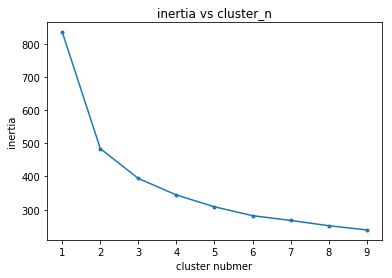

In [90]:
clusterNumber = np.arange(1, 10)
inertia_women = np.empty(len(clusterNumber))
for i, number in enumerate(clusterNumber):
    model = KMeans(n_clusters = number)
    model.fit(women_cluster)
    inertia_women[i] = model.inertia_
plt.plot(clusterNumber, inertia_women,  marker = '.')
plt.title('inertia vs cluster_n')
plt.xlabel('cluster nubmer')
plt.ylabel('inertia')
plt.show()

Text(0.5,1,"Women' Attributes centroids for 4 clusters")

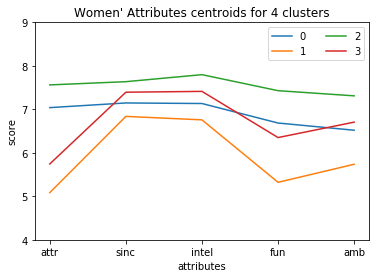

In [91]:
# from the above result, I would like to make the cluster number for men to be 4
women_model = KMeans(n_clusters = 4, random_state = 42)
women_model.fit(women_cluster)
women_centroids = women_model.cluster_centers_
for i in range(4):
    plt.plot(np.arange(5), women_centroids[i])
plt.xlabel('attributes')
plt.xticks(np.arange(5), ['attr', 'sinc', 'intel', 'fun', 'amb'])
plt.ylabel('score')
plt.ylim([4, 9])
plt.legend(np.arange(4), loc = 'upper right', ncol= 2)
plt.title(r"Women' Attributes centroids for 4 clusters")

In [92]:
all_sided_w = women_cluster[women_model.labels_ == 2]
print(all_sided_w.head())
well_looked_w = women_cluster[women_model.labels_ == 0]
print(well_looked_w.head())
no_attr_w = women_cluster[women_model.labels_ == 3]
print(no_attr_w.head())
low_status_w = women_cluster[women_model.labels_ == 1]
print(low_status_w.head())

     attr_o  sinc_o  intel_o  fun_o  amb_o
iid                                       
1       6.7     7.4      8.0    7.2    8.0
2       7.7     7.1      7.9    7.5    7.5
4       7.0     7.1      7.7    7.5    7.7
6       6.8     7.8      8.6    7.0    8.0
7       7.9     7.6      8.2    7.0    7.5
       attr_o    sinc_o   intel_o     fun_o     amb_o
iid                                                  
10   6.333333  7.000000  6.400000  6.400000  6.200000
24   6.500000  6.933333  7.333333  6.625000  6.714286
25   7.687500  7.266667  6.933333  7.333333  6.000000
26   7.625000  7.133333  7.266667  7.466667  6.500000
28   6.625000  7.437500  7.250000  6.375000  6.625000
     attr_o    sinc_o   intel_o     fun_o     amb_o
iid                                                
3    6.5000  7.100000  7.300000  6.200000  7.111111
5    5.3000  7.700000  7.600000  7.200000  7.800000
21   5.0625  7.312500  7.750000  5.666667  6.666667
23   5.9375  7.266667  6.937500  6.250000  6.400000
29   5.75

In [93]:
men_side = [all_sided_m, well_looked_m, no_attr_m, low_status_m]
women_side = [all_sided_w, well_looked_w, no_attr_w, low_status_w]
match_rate = np.zeros((4, 4))
men_dec = np.zeros((4, 4))
women_dec = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        result = dating.merge(men_side[i], left_on = 'iid', right_index = True).merge(women_side[j], left_on = 'pid', right_index = True)[['match', 'dec', 'dec_o']] 
        match_rate[i, j] = sum(result['match']) / len(result['match'])
        men_dec[i, j] = sum(result['dec']) / len(result['dec'])
        women_dec[j, i] = sum(result['dec_o']) / len(result['dec_o'])

In [94]:
print(match_rate)
print(men_dec)
print(women_dec)

[[ 0.42145594  0.28482972  0.17131474  0.06321839]
 [ 0.32644628  0.22289157  0.13946588  0.03255814]
 [ 0.19130435  0.14473684  0.13963964  0.1183432 ]
 [ 0.09795918  0.05952381  0.07536232  0.09090909]]
[[ 0.65517241  0.51393189  0.25896414  0.1091954 ]
 [ 0.66528926  0.54216867  0.26706231  0.13023256]
 [ 0.70869565  0.625       0.47747748  0.38461538]
 [ 0.74285714  0.60714286  0.40869565  0.27777778]]
[[ 0.6091954   0.44628099  0.29130435  0.13469388]
 [ 0.51393189  0.36445783  0.20394737  0.08630952]
 [ 0.64940239  0.49851632  0.30630631  0.22608696]
 [ 0.60344828  0.45116279  0.32544379  0.25252525]]


In [95]:
#correlation between those attributes? and variance for each attributes
print(men_cluster.corr())
print(women_cluster.corr())

           attr_o    sinc_o   intel_o     fun_o     amb_o
attr_o   1.000000  0.305299  0.279350  0.718045  0.323098
sinc_o   0.305299  1.000000  0.687746  0.373396  0.418470
intel_o  0.279350  0.687746  1.000000  0.374089  0.656451
fun_o    0.718045  0.373396  0.374089  1.000000  0.450813
amb_o    0.323098  0.418470  0.656451  0.450813  1.000000
           attr_o    sinc_o   intel_o     fun_o     amb_o
attr_o   1.000000  0.264840  0.372222  0.648896  0.495067
sinc_o   0.264840  1.000000  0.643742  0.370305  0.341931
intel_o  0.372222  0.643742  1.000000  0.394013  0.636671
fun_o    0.648896  0.370305  0.394013  1.000000  0.578336
amb_o    0.495067  0.341931  0.636671  0.578336  1.000000


From the attributes' correlation for both men and women, we can see that the results are similar to each other. Attractiveness and fun are strongly correlated, while intelligence are strongly correlated with fun and ambitious while ambitious and fun are not strongly related to each other. The results are aligned with our previous analysis referred to the cluster plots above. Attractiveness and fun are more external attributes while the other three are internal ones. It seems the score for fun and attractiveness can be affected each other, a funnies person can be seen as more attractive, while a more attractive person can also be scored higher for the fun column. The similar scenario applies for sinc/intel/amb attributes as well. Let's take a look at their own variance:

In [96]:
print(men_cluster.var())
print(women_cluster.var())

attr_o     1.493908
sinc_o     0.634789
intel_o    0.440148
fun_o      1.278153
amb_o      0.624841
dtype: float64
attr_o     1.171426
sinc_o     0.305520
intel_o    0.321507
fun_o      0.755404
amb_o      0.503371
dtype: float64


The resulting variance for attractive and fun are much larger than the other three attributes. It seems that attractiveness and fun can be easily scored or detected in a short time during speed dating event, while sincerity/intelligence/ambitiousness need more time to be evaluated which leads to less variance across these three attributes. The pattern for men and women are pretty similar.

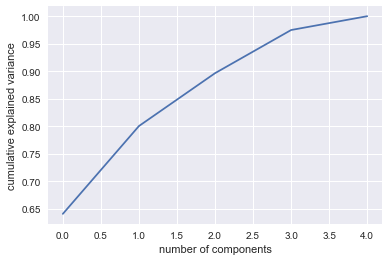

In [104]:
#PCA part
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
pca = PCA().fit(women_cluster)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

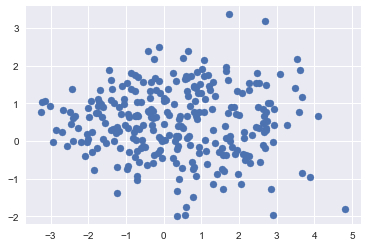

In [106]:
pca = PCA(n_components=2)
pca.fit(women_cluster)
X_pca = pca.transform(men_cluster)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.axis('equal');

In [108]:
print(pca.components_)

[[-0.6984743  -0.18371931 -0.2412969  -0.53081772 -0.37200702]
 [-0.58173518  0.44871339  0.50792388  0.0676959   0.44460215]]


In [98]:
men_cluster.head()

,attr_o,sinc_o,intel_o,fun_o,amb_o
iid,,,,,
11,5.6,8.8,8.2,5.4,6.4
12,7.1,6.6,7.1,6.7,6.9
13,4.8,7.9,8.8,7.0,5.9
14,8.2,7.6,7.4,7.6,6.6
15,5.7,7.6,7.7,7.2,6.5


In [172]:
pd.set_option('display.max_rows', 500)

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

In [216]:
## questions:
#  if age difference is added as a feature, should I also add the age for each gender as additional features?
#  like_o or prob_o here are kind of data leak? Not proper to add them to the feature list right?

## random forest
from sklearn.ensemble import RandomForestClassifier
#RandomForestClassifier based on match 
temp1=dating[['iid','gender','pid','samerace','int_corr', 'match', 'age',
             'race','imprace','imprelig','attr','sinc','intel','fun','amb']].merge(
    dating[['iid', 'pid', 'age', 'attr', 'sinc', 'intel', 'fun', 'amb', 'race', 'imprace', 'imprelig']], 
                                         left_on = ['pid', 'iid'], right_on = ['iid', 'pid'])


In [217]:
temp1 = temp1[temp1.gender == 0]

In [232]:
temp1.isnull().sum()
temp1 = temp1.fillna(np.mean)

In [219]:
temp1.shape

(4184, 26)

In [222]:
temp1.head()
temp1['age_diff'] = np.abs(temp1.age_x - temp1.age_y)
temp1['attr_diff'] = np.abs(temp1.attr_x - temp1.attr_y)
temp1['sinc_diff'] = np.abs(temp1.sinc_x - temp1.sinc_y)
temp1['intel_diff'] = np.abs(temp1.intel_x - temp1.intel_y)
temp1['fun_diff'] = np.abs(temp1.fun_x - temp1.fun_y)
temp1['amb_diff'] = np.abs(temp1.amb_x - temp1.amb_y)

In [234]:
rf_data = temp1[['samerace', 'int_corr', 'age_diff', 'attr_diff', 'sinc_diff', 'intel_diff', 'fun_diff', 'amb_diff', 
                'race_x', 'race_y', 'match']]

In [235]:
rf_data.head()

,samerace,int_corr,age_diff,attr_diff,sinc_diff,intel_diff,fun_diff,amb_diff,race_x,race_y,match
0,0,0.14,6,0,1,1,1,2,4,2,0
1,0,0.54,1,0,0,3,1,2,4,2,0
2,1,0.16,1,5,2,1,2,5,4,4,1
3,0,0.61,2,0,2,1,1,3,4,2,1
4,0,0.21,3,3,1,2,1,3,4,3,1


Let's go beyond the attributes scores and look into more other available interesting features in the dataset. This time I would like to apply classification algorithm on it to predict match probability using lasso/random forest:

In [251]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(rf_data.drop('match', axis = 1), rf_data['match'])



TypeError: float() argument must be a string or a number, not 'function'

In [249]:
rf_data.drop('match', axis = 1)

,samerace,int_corr,age_diff,attr_diff,sinc_diff,intel_diff,fun_diff,amb_diff,race_x,race_y
0,0,0.14,6,0,1,1,1,2,4,2
1,0,0.54,1,0,0,3,1,2,4,2
2,1,0.16,1,5,2,1,2,5,4,4
3,0,0.61,2,0,2,1,1,3,4,2
4,0,0.21,3,3,1,2,1,3,4,3
5,0,0.25,4,3,2,1,4,1,4,2
6,0,0.34,9,4,0,0,1,2,4,2
7,0,0.5,6,2,2,2,0,3,4,2
8,0,0.28,7,0,1,0,1,0,4,2
9,0,-0.36,3,1,0,0,2,4,4,2


In [250]:
rf_data['match']

0       0
1       0
2       1
3       1
4       1
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      1
34      0
35      0
36      0
37      0
38      1
39      0
40      0
41      0
42      0
43      1
44      0
45      0
46      0
47      0
48      1
49      0
50      0
51      0
52      0
53      1
54      0
55      0
56      0
57      0
58      1
59      0
60      0
61      0
62      0
63      1
64      0
65      0
66      0
67      0
68      1
69      0
70      0
71      1
72      1
73      1
74      1
75      1
76      0
77      1
78      1
79      1
80      0
81      1
82      1
83      1
84      1
85      1
86      1
87      0
88      1
89      0
90      0
91      0
92      1
93      0
94      0
95      0
96      0
97      0
98      1
99      0


In [160]:
np.mean([1, 2])

1.5

In [180]:
dating.merge?